<a href="https://colab.research.google.com/github/CheeRanidu/CMP7005/blob/main/st20272023_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import os

# Change to the desired directory
os.chdir('/content/drive/MyDrive/Beijin_Air_Dataset')

# Verify the current directory
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/MyDrive/Beijin_Air_Dataset


In [33]:
import glob
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'Aotizhongxin.csv']

In [34]:
df_list = [pd.read_csv(file) for file in csv_files]

In [35]:
df_merged = pd.concat(df_list, axis=0, ignore_index=True)

In [36]:
df_merged.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2013,3,4,23,54.0,75.0,21.0,43.0,1200.0,95.0,4.2,1012.6,-11.5,0.0,ESE,0.8,Changping
96,97,2013,3,5,0,57.0,69.0,20.0,37.0,900.0,95.0,2.8,1012.1,-11.2,0.0,ENE,0.4,Changping
97,98,2013,3,5,1,48.0,57.0,38.0,66.0,1600.0,95.0,1.8,1011.7,-11.0,0.0,NNE,0.6,Changping
98,99,2013,3,5,2,65.0,99.0,32.0,54.0,1399.0,95.0,0.8,1011.4,-10.7,0.0,N,0.6,Changping


In [37]:
df_merged.shape

(280512, 18)

In [48]:
# Capitalize all column names
df_merged.columns = df_merged.columns.str.upper()

# Verify the changes
print(df_merged.columns)


Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WD', 'WSPM', 'STATION', 'DATETIME'],
      dtype='object')


In [39]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   NO       280512 non-null  int64  
 1   YEAR     280512 non-null  int64  
 2   MONTH    280512 non-null  int64  
 3   DAY      280512 non-null  int64  
 4   HOUR     280512 non-null  int64  
 5   PM2.5    274441 non-null  float64
 6   PM10     275976 non-null  float64
 7   SO2      275149 non-null  float64
 8   NO2      272329 non-null  float64
 9   CO       266224 non-null  float64
 10  O3       272752 non-null  float64
 11  TEMP     280224 non-null  float64
 12  PRES     280229 non-null  float64
 13  DEWP     280222 non-null  float64
 14  RAIN     280232 non-null  float64
 15  WD       279453 non-null  object 
 16  WSPM     280279 non-null  float64
 17  STATION  280512 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 38.5+ MB


Converting Object dtypes to category dtype for better Memory-effeciency and Performance.


In [40]:
# Convert the 'station' column to 'category' dtype
df_merged['STATION'] = df_merged['STATION'].astype('category')
# Convert the 'direction' column to 'category' dtype
df_merged['WD'] = df_merged['WD'].astype('category')



In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   NO       280512 non-null  int64   
 1   YEAR     280512 non-null  int64   
 2   MONTH    280512 non-null  int64   
 3   DAY      280512 non-null  int64   
 4   HOUR     280512 non-null  int64   
 5   PM2.5    274441 non-null  float64 
 6   PM10     275976 non-null  float64 
 7   SO2      275149 non-null  float64 
 8   NO2      272329 non-null  float64 
 9   CO       266224 non-null  float64 
 10  O3       272752 non-null  float64 
 11  TEMP     280224 non-null  float64 
 12  PRES     280229 non-null  float64 
 13  DEWP     280222 non-null  float64 
 14  RAIN     280232 non-null  float64 
 15  WD       279453 non-null  category
 16  WSPM     280279 non-null  float64 
 17  STATION  280512 non-null  category
dtypes: category(2), float64(11), int64(5)
memory usage: 34.8 MB


In [42]:
df_merged.describe()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,274441.000000,275976.000000,275149.000000,272329.000000,266224.000000,272752.000000,280224.000000,280229.000000,280222.000000,280232.000000,280279.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.426228,103.422622,15.804754,48.712058,1198.780602,58.982900,13.524339,1010.093102,2.375351,0.064501,1.730218
std,10122.122958,1.177199,3.448709,8.800108,6.922199,79.903323,91.373721,21.604235,34.965866,1134.452174,56.591943,11.444337,10.463074,13.822351,0.825446,1.254662
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,2.856000,21.000000,500.000000,13.000000,3.100000,1001.600000,-9.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,7.000000,41.000000,900.000000,47.000000,14.500000,1009.700000,2.900000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,20.000000,69.000000,1500.000000,83.000000,23.200000,1018.300000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.000000,29.100000,72.500000,12.900000


In [46]:
df_merged.head()

,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [44]:
#Droping NO column
df_merged = df_merged.drop('NO', axis=1)

Date-time Convertion

In [47]:
# Combine the year, month, day, and hour into a single datetime column
df_merged['datetime'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Drop the original date and time columns if no longer needed
df_merged = df_merged.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'])

# # Optionally set 'datetime' as the index
# data = data.set_index('datetime')

# Display the first few rows to verify
df_merged.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,datetime
0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     274441 non-null  float64       
 1   PM10      275976 non-null  float64       
 2   SO2       275149 non-null  float64       
 3   NO2       272329 non-null  float64       
 4   CO        266224 non-null  float64       
 5   O3        272752 non-null  float64       
 6   TEMP      280224 non-null  float64       
 7   PRES      280229 non-null  float64       
 8   DEWP      280222 non-null  float64       
 9   RAIN      280232 non-null  float64       
 10  WD        279453 non-null  category      
 11  WSPM      280279 non-null  float64       
 12  STATION   280512 non-null  category      
 13  DATETIME  280512 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(11)
memory usage: 26.2 MB


Handling Missing Values

In [50]:
df_merged.isnull().sum()

,0
PM2.5,6071
PM10,4536
SO2,5363
NO2,8183
CO,14288
O3,7760
TEMP,288
PRES,283
DEWP,290
RAIN,280


In [51]:
null_percentage = df_merged.isnull().mean() * 100

# Display the result
print(null_percentage)

PM2.5       2.164257
PM10        1.617043
SO2         1.911861
NO2         2.917166
CO          5.093543
O3          2.766370
TEMP        0.102669
PRES        0.100887
DEWP        0.103382
RAIN        0.099817
WD          0.377524
WSPM        0.083062
STATION     0.000000
DATETIME    0.000000
dtype: float64


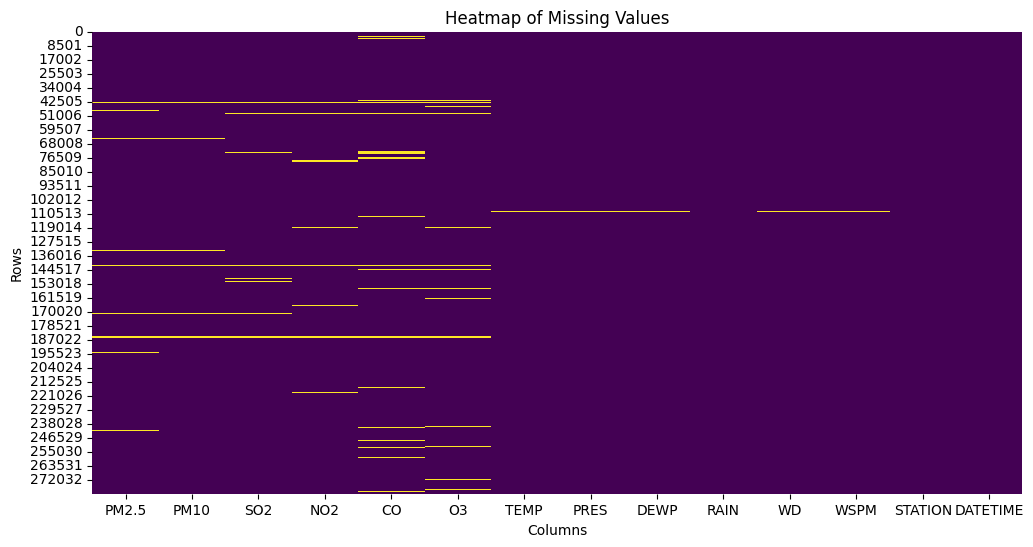

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()